### Standard, min-max, robust 비교 고찰

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [6]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1','x2'])

In [7]:
standard_df

,x1,x2
0,-0.375565,-0.025896
1,-0.025933,1.041026
2,0.294373,1.047706
3,-0.081478,-0.119291
4,-0.100940,-0.463856
...,...,...
1020,-5.619845,5.357158
1021,-5.138879,4.707969
1022,-4.100589,7.059522
1023,-5.223988,4.761648


In [8]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1','x2'])

In [9]:
minmax_df

,x1,x2
0,0.705606,0.228356
1,0.750239,0.344551
2,0.791128,0.345278
3,0.743148,0.218185
4,0.740664,0.180660
...,...,...
1020,0.036138,0.814603
1021,0.097537,0.743902
1022,0.230081,1.000000
1023,0.086672,0.749748


In [10]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1','x2'])

In [11]:
robust_df

,x1,x2
0,-0.622072,0.079105
1,-0.171400,1.382904
2,0.241470,1.391067
3,-0.242997,-0.035025
4,-0.268083,-0.456090
...,...,...
1020,-7.381887,6.657297
1021,-6.761927,5.863975
1022,-5.423584,8.737617
1023,-6.871631,5.929572


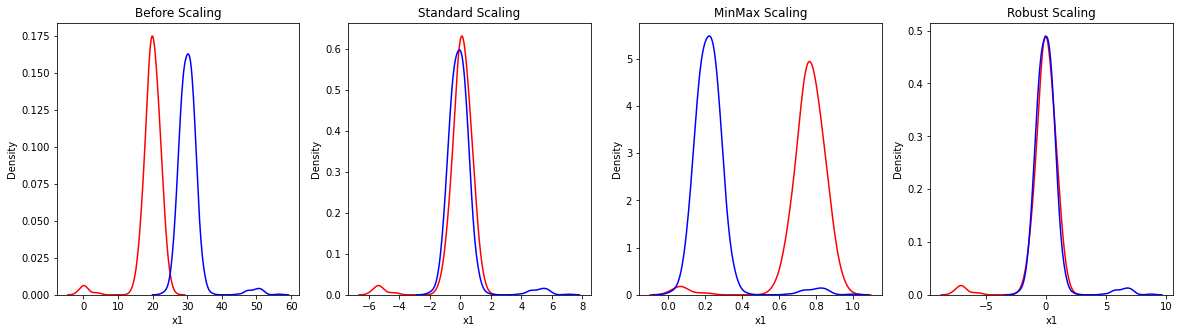

In [21]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color='r')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='b')

ax4.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(robust_df['x2'], ax=ax4, color='b')

plt.show()

In [22]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### StandardScaler
* from sklearn.preprocessing import StandardScaler
* StandardScaler(*, copy=True, with_mean=True, with_std=True)
* fit(X[, y, sample_weight])
    * Compute the mean and std to be used for later scaling.
* fit_transform(X[, y])
    * Fit to data, then transform it.
* get_feature_names_out([input_features])
    * Get output feature names for transformation.
* get_params([deep])
    * Get parameters for this estimator.
* inverse_transform(X[, copy])
    * Scale back the data to the original representation.
* partial_fit(X[, y, sample_weight])
    * Online computation of mean and std on X for later scaling.
* set_params(**params)
    * Set the parameters of this estimator.
* transform(X[, copy])
    * Perform standardization by centering and scaling.
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.std())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


### MinMaxScaler
* from sklearn.preprocessing import MinMaxScaler
* MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscale#sklearn.preprocessing.MinMaxScaler

In [40]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_df_mscaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_mscaled = pd.DataFrame(data=iris_df_mscaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_mscaled.min())
print('\nfeature들의 최대 값')
print(iris_df_mscaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### RobustScaler
* from sklearn.preprocessing import RobustScaler
* RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust%20sca#sklearn.preprocessing.RobustScaler

In [35]:
from sklearn.preprocessing import RobustScaler

# RobustScaler객체 생성
scaler = RobustScaler()
# RobustScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 중앙 값')
print(iris_df_scaled.median())
print('\nfeature들의 IQR 값')
print(iris_df_scaled.quantile())

feature들의 중앙 값
sepal length (cm)    0.000000e+00
sepal width (cm)     0.000000e+00
petal length (cm)    1.266348e-16
petal width (cm)     0.000000e+00
dtype: float64

feature들의 IQR 값
sepal length (cm)    0.000000e+00
sepal width (cm)     0.000000e+00
petal length (cm)    1.266348e-16
petal width (cm)     0.000000e+00
Name: 0.5, dtype: float64


In [36]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


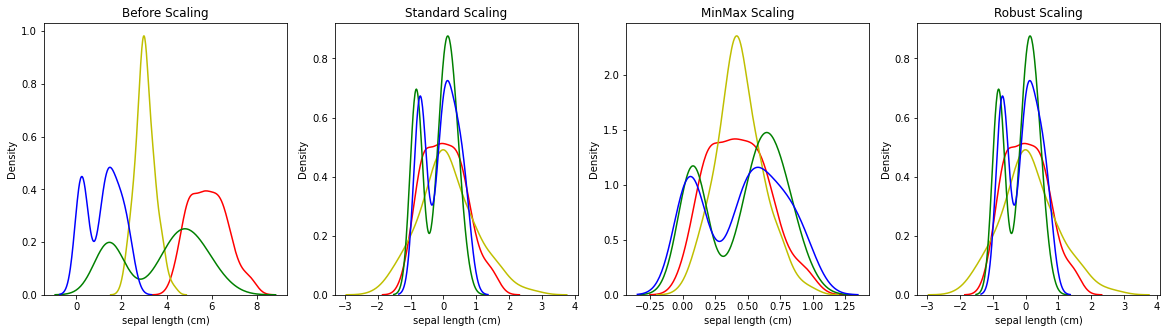

In [41]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df['petal width (cm)'], ax = ax1, color = 'b')

ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax2, color = 'b')

ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_mscaled['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_mscaled['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_mscaled['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_mscaled['petal width (cm)'], ax = ax3, color = 'b')

ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')

plt.show()